In [939]:
pip install squarify 

Note: you may need to restart the kernel to use updated packages.


In [940]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import squarify    # pip install squarify (algorithm for treemap)


# I. Explore Data Set

In [941]:
data = pd.read_excel('/Users/huuthinle/Desktop/Ecommerce Retail/ecommerce retail.xlsx')
data = pd.DataFrame(data)


## 1. Correcting data type

In [942]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [943]:
data = data.dropna()

In [944]:
#CustomerID: float64 -> int64
data['CustomerID'] = data['CustomerID'].astype(int)

## 2. Filter data

In [945]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [946]:
#Remove canceled transactions, quantity >0 & unit price >0:
data = data[(data['Quantity'] >0) & (data ['UnitPrice'] > 0)]
data.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [947]:
data.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


# II. Build up RFM scores for each customer:


 - Recency: Number of days since date of last purchase each cusomer as R_score
- Frequency: Number of orders per customer as F_score
- Monetary: Sum of purchase price per customer as M_score

In [948]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [949]:
data['Monetary'] = data['Quantity']*data['UnitPrice']
result= data.groupby('CustomerID')['Monetary'].sum()
result= pd.DataFrame(result)
result

,Monetary
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,178.05


In [950]:
last_day = "2011,12,31"

# Convert last_day to a datetime object
last_day = datetime.strptime(last_day, "%Y,%m,%d")

# Calculate recency (Recency) for each customer
result['Recency'] = (last_day - data.groupby('CustomerID')['InvoiceDate'].max()).dt.days

#Frequency::: sai sai
result['Frequency'] = data.groupby('CustomerID')['InvoiceNo'].nunique()

In [951]:
result['R_score'] = pd.qcut(result['Recency'], 5, labels = [5,4,3,2,1])
result['M_score'] = pd.qcut(result['Monetary'], 5, labels = [1,2,3,4,5])
result['F_score'] = pd.qcut(result['Frequency'].rank(method = 'first'), 5, labels = [1,2,3,4,5], duplicates= 'drop')
result['RFM_score'] = result['R_score'].astype(str) + result['F_score'].astype(str) + result['M_score'].astype(str)
result = result.reset_index()
result

,CustomerID,Monetary,Recency,Frequency,R_score,M_score,F_score,RFM_score
0,12346,77183.60,346,1,1,5,1,115
1,12347,4310.00,23,7,5,5,5,555
2,12348,1797.24,96,4,2,4,4,244
3,12349,1757.55,39,1,4,4,1,414
4,12350,334.40,331,1,1,2,1,112
...,...,...,...,...,...,...,...,...
4333,18280,180.60,298,1,1,1,2,121
4334,18281,80.82,201,1,1,1,2,121
4335,18282,178.05,28,2,5,1,3,531
4336,18283,2094.88,24,16,5,5,5,555


In [952]:
segment = pd.read_excel('/Users/huuthinle/Desktop/Ecommerce Retail/ecommerce retail.xlsx', sheet_name = 'Segmentation')
seg = pd.DataFrame(segment)
seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425, 4..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214, 215, 115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [953]:
seg['RFM_score'] = seg['RFM Score'].str.split(', ')
seg = seg.explode('RFM_score').reset_index(drop=True)
seg = seg[['Segment','RFM_score']]

seg

,Segment,RFM_score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [954]:
## Merge result with seg based on RFM_score, allowing many-to-many merge
joined =pd.merge(result, seg, on = "RFM_score")
joined

,CustomerID,Monetary,Recency,Frequency,R_score,M_score,F_score,RFM_score,Segment
0,12346,77183.60,346,1,1,5,1,115,Cannot Lose Them
1,12501,2169.39,357,1,1,5,1,115,Cannot Lose Them
2,13135,3096.00,217,1,1,5,1,115,Cannot Lose Them
3,14439,2661.24,340,1,1,5,1,115,Cannot Lose Them
4,12347,4310.00,23,7,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
4333,17580,215.72,273,3,1,1,4,141,Lost customers
4334,16500,400.86,25,6,5,2,5,552,Potential Loyalist
4335,16668,306.72,36,6,4,2,5,452,Potential Loyalist
4336,17988,201.12,32,7,5,1,5,551,Potential Loyalist


## 4. Distribution of Recency, Frequency, and Monetary


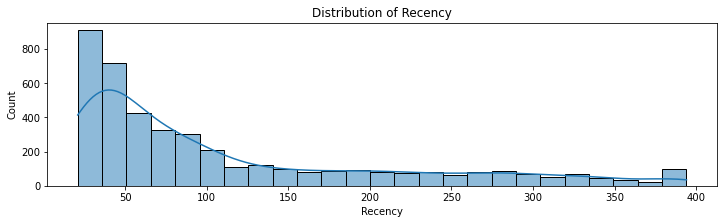

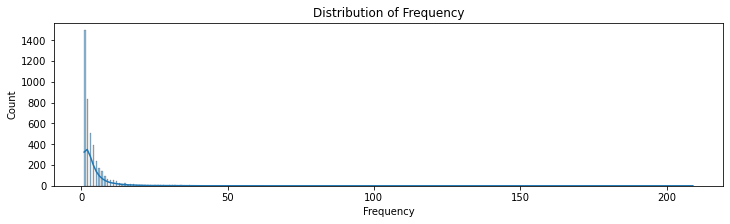

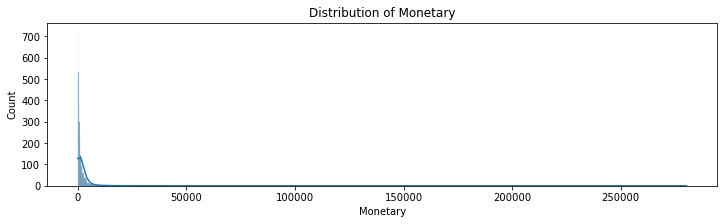

In [955]:
colnames = ['Recency', 'Frequency', 'Monetary']
for col in colnames:
    fig, ax = plt.subplots (figsize =(12,3))
    sns.histplot(joined[col], kde=True)  # Use height and aspect to control the figure size
    ax.set_title('Distribution of %s' % col)
    plt.show()

## 5. Analysis of RFM Segments


Text(0, 0.5, 'Number')

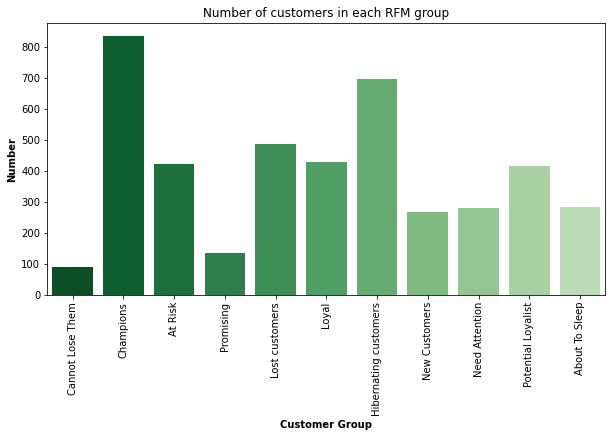

In [956]:
palette = sns.color_palette("Greens_r", n_colors=15)
plt.figure (figsize = (10,5))
sns.countplot( x = 'Segment', data = joined, palette = palette)
plt.title ('Number of customers in each RFM group')
plt.xticks (rotation = 90)
plt.xlabel("Customer Group", weight = 'bold', fontsize = 10)
plt.ylabel('Number', weight = 'bold', fontsize = 10)

In [957]:
agg_fun= {'CustomerID':'count',
          'Recency':'mean',
          'Frequency': 'mean',
          'Monetary':'sum'}
cus_class = joined.groupby('Segment').agg(agg_fun).sort_values ('Recency').reset_index()
cus_class.rename(columns = {'CustomerID' : "count"}, inplace = True)
cus_class['count_share'] = cus_class['count']/cus_class['count'].sum()
cus_class['monetary_share'] = cus_class['Monetary']/cus_class['Monetary'].sum()
cus_class

,Segment,count,Recency,Frequency,Monetary,count_share,monetary_share
0,Champions,835,31.816766,12.113772,5604376.680,0.192485,0.628899
1,Promising,136,45.904412,1.323529,121031.350,0.031351,0.013582
2,Potential Loyalist,414,47.053140,2.526570,225740.110,0.095436,0.025332
3,New Customers,267,48.891386,1.071161,59755.620,0.061549,0.006706
4,Need Attention,280,54.350000,3.103571,462835.741,0.064546,0.051937
5,Loyal,428,57.070093,5.320093,1021224.390,0.098663,0.114597
6,About To Sleep,283,107.325088,1.282686,77885.540,0.065237,0.008740
7,At Risk,422,164.419431,3.763033,751808.221,0.097280,0.084365
8,Hibernating customers,696,169.916667,1.554598,285673.342,0.160443,0.032057
9,Cannot Lose Them,91,256.230769,2.285714,203671.300,0.020977,0.022855


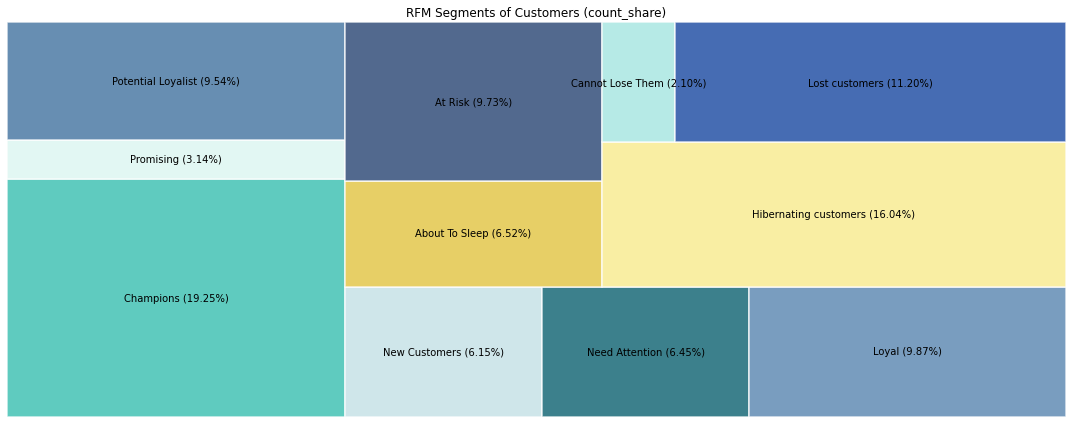

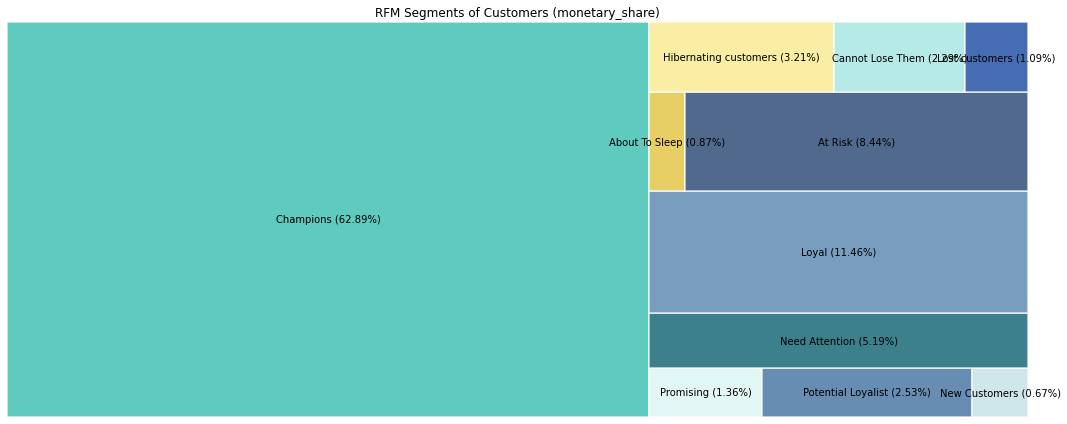

In [958]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']
for col in ['count_share', 'monetary_share']:
    labels = cus_class['Segment'] + cus_class[col].apply(lambda x: ' ({0:.2f}%)'.format(x*100))
     
    fig, ax = plt.subplots(figsize=(15,6))
    squarify.plot(sizes=cus_class[col], label=labels, alpha=.8, color=colors,
                  bar_kwargs = dict(linewidth = 1.5, edgecolor = 'white'))
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [959]:
import plotly.express as px
import pandas as pd

hehe = joined.merge(data[['CustomerID','Country']], on = 'CustomerID')
hehe

,CustomerID,Monetary,Recency,Frequency,R_score,M_score,F_score,RFM_score,Segment,Country
0,12346,77183.60,346,1,1,5,1,115,Cannot Lose Them,United Kingdom
1,12501,2169.39,357,1,1,5,1,115,Cannot Lose Them,Germany
2,12501,2169.39,357,1,1,5,1,115,Cannot Lose Them,Germany
3,12501,2169.39,357,1,1,5,1,115,Cannot Lose Them,Germany
4,12501,2169.39,357,1,1,5,1,115,Cannot Lose Them,Germany
...,...,...,...,...,...,...,...,...,...,...
397879,18037,70.02,175,6,2,1,5,251,About To Sleep,United Kingdom
397880,18037,70.02,175,6,2,1,5,251,About To Sleep,United Kingdom
397881,18037,70.02,175,6,2,1,5,251,About To Sleep,United Kingdom
397882,18037,70.02,175,6,2,1,5,251,About To Sleep,United Kingdom


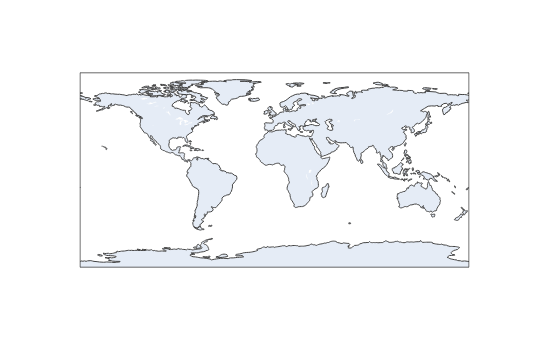

In [966]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

fig = px.scatter_geo(hehe)
fig.show()